## Prediction for next 12 months

In [2]:
#Import files
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#read the file with columns date and revenuee
df=pd.read_csv('./data/new_data.csv')
df.head()

,month_year,revenue
0,2013-01,3547787.00
1,2013-02,3424142.48
2,2013-03,3606974.50
3,2013-04,4971963.50
4,2013-05,3335888.42


In [4]:
## Cleaning up the data
df.columns=["Month","Revenue"]
df.head()

,Month,Revenue
0,2013-01,3547787.00
1,2013-02,3424142.48
2,2013-03,3606974.50
3,2013-04,4971963.50
4,2013-05,3335888.42


In [5]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])
df.head()

,Month,Revenue
0,2013-01-01,3547787.00
1,2013-02-01,3424142.48
2,2013-03-01,3606974.50
3,2013-04-01,4971963.50
4,2013-05-01,3335888.42


In [6]:
#Set Month column as Index
df.set_index('Month',inplace=True)
df.head()

,Revenue
Month,
2013-01-01,3547787.00
2013-02-01,3424142.48
2013-03-01,3606974.50
2013-04-01,4971963.50
2013-05-01,3335888.42


In [7]:
#Mean value of revenue
df['Revenue'].mean()

4100441.880151516

<Axes: xlabel='Month'>

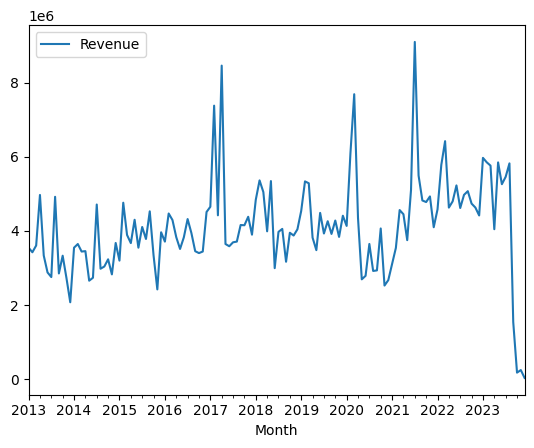

In [8]:
#Line graph to show data distribution for 11 months
df.plot()

## Check whether the data is stationary

In [9]:
#Using Augmented Dickey-Fuller to check for stationary data
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['Revenue'])

In [10]:
def adfuller_test(revenue):
    result=adfuller(revenue)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

adfuller_test(df['Revenue'])

ADF Test Statistic : -5.964205201337284
p-value : 2.0056841344757188e-07
#Lags Used : 0
Number of Observations Used : 131
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## ACF and PACF plots

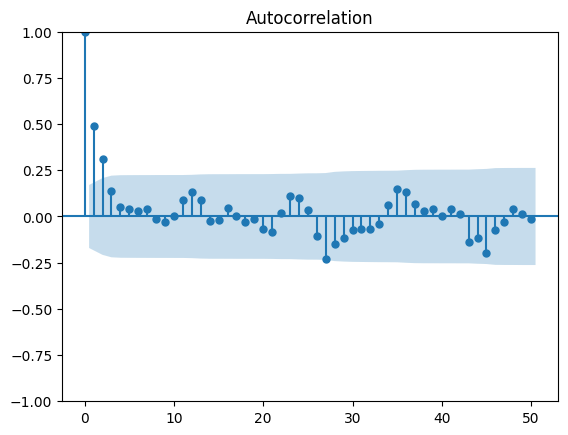

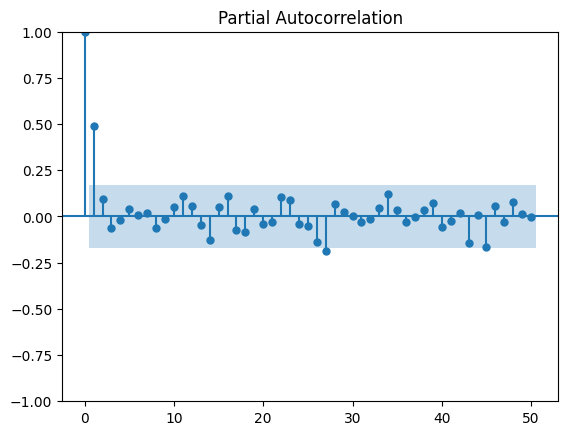

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plots to decide p and q values
plot_acf(df['Revenue'], lags=50)
plot_pacf(df['Revenue'], lags=50)
plt.show()

In [12]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (example: p=1, d=0, q=1)
model = ARIMA(df['Revenue'], order=(1, 0, 1))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

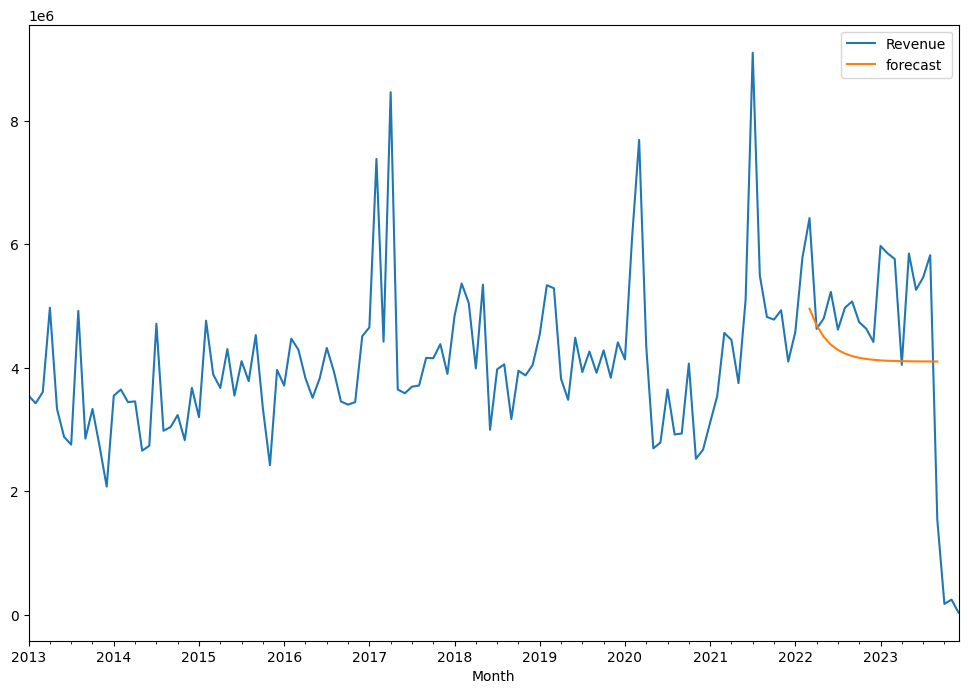

In [13]:
df['forecast']=model_fit.predict(start=110,end=128,dynamic=True)
df[['Revenue','forecast']].plot(figsize=(12,8))

In [14]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,12)]

In [15]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_datest_df.head()

,Revenue,forecast
2024-01-01,NaN,NaN
2024-02-01,NaN,NaN
2024-03-01,NaN,NaN
2024-04-01,NaN,NaN
2024-05-01,NaN,NaN


In [16]:
future_df=pd.concat([df,future_datest_df])

/tmp/ipykernel_3302/1723908026.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df=pd.concat([df,future_datest_df])


<Axes: >

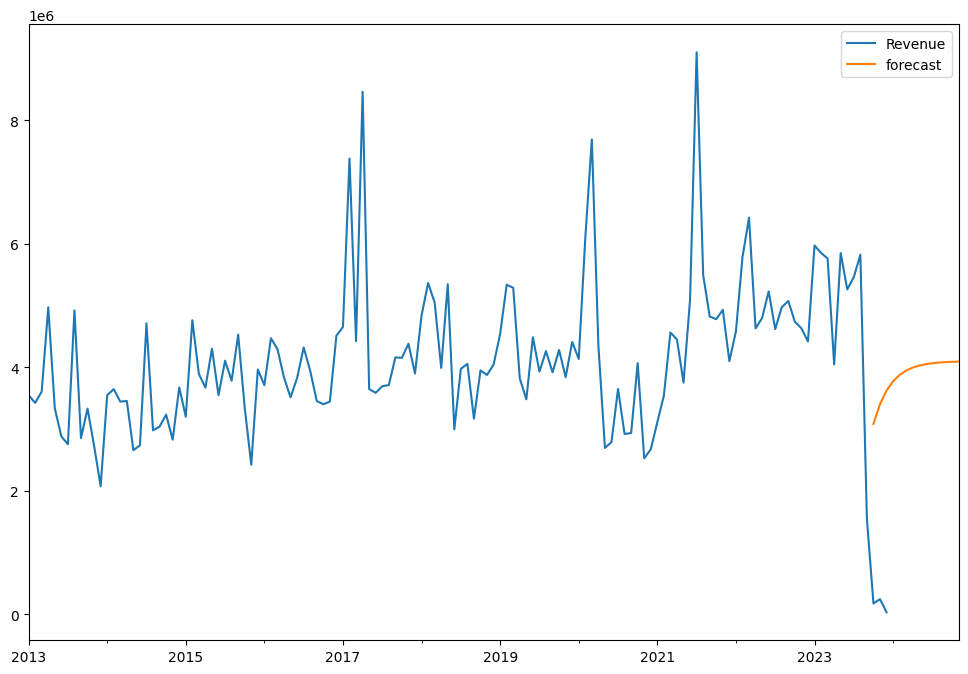

In [17]:
future_df['forecast'] = model_fit.predict(start = 129, end = 145, dynamic= True)  
future_df[['Revenue', 'forecast']].plot(figsize=(12, 8))

## Metric Calculation

In [33]:
#data_revenue has only revenue column
df_new = pd.read_csv('./data/data_revenue.csv')
df_new.head()

,revenue
0,3547787.00
1,3547921.50
2,3198967.00
3,3711749.65
4,4652879.23


In [34]:
df_new.mean()

revenue    4.100442e+06
dtype: float64

In [35]:
df_new.std()

revenue    1.295482e+06
dtype: float64

In [36]:
#Split the data into training and testing sets
msk = (df_new.index < len(df)- 30)
df_train = df_new[msk]['revenue'].copy()
df_test = df_new[~msk]['revenue'].copy()
df_test.head()

102    3401886.00
103    4153764.43
104    3950921.76
105    4281147.36
106    4066863.83
Name: revenue, dtype: float64

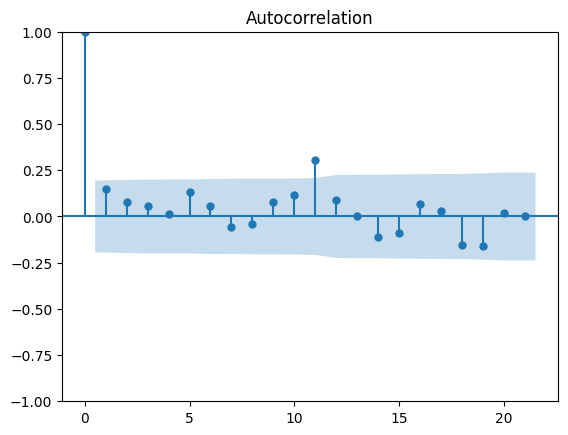

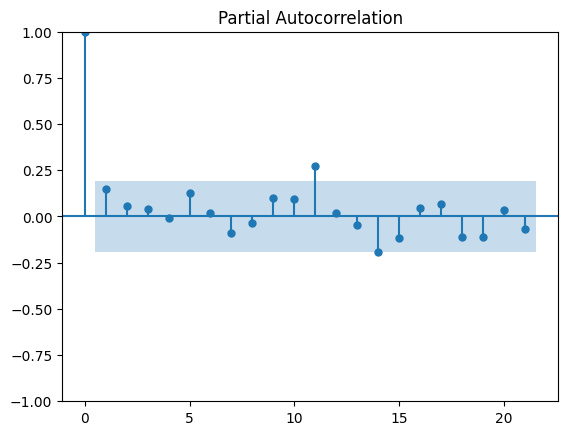

In [37]:
#Check whether the data is stationary
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_original = plot_acf(df_train)
pacf_original = plot_pacf(df_train)

In [38]:
#ADF test to find p-value
#Data is stationary as the p-value is less than 0.05 so no need of differencing
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_train)
print(f'p-value: {adf_test[1]}')

p-value: 8.180640359505501e-14


## Manual forecast

In [39]:
#Choosing the values for p,d,q as 1,0,1 based on ACF and PACF values
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train, order=(0,0,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                revenue   No. Observations:                  102
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1572.811
Date:                Fri, 22 Nov 2024   AIC                           3151.622
Time:                        07:14:05   BIC                           3159.497
Sample:                             0   HQIC                          3154.811
                                - 102                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.295e+06   1.38e+05     31.072      0.000    4.02e+06    4.57e+06
ma.L1          0.1306      0.137      0.955      0.339      -0.137       0.399
sigma2      1.486e+12      0.081   1.83e+13      0.0

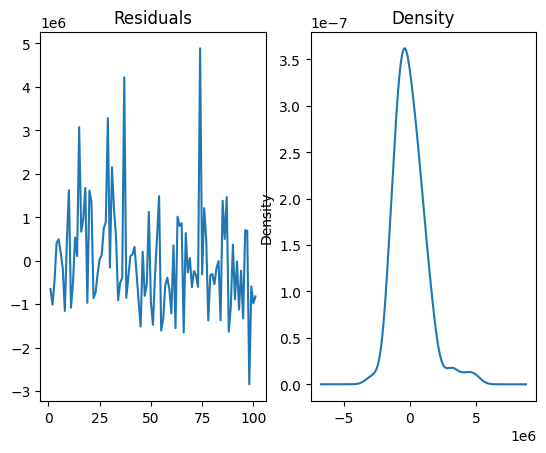

In [40]:
#Checking for residuals and density
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

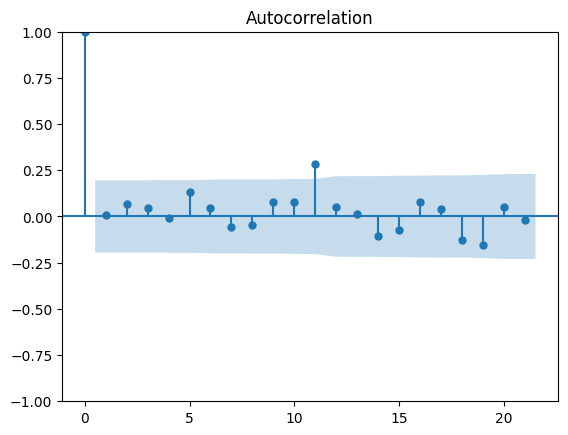

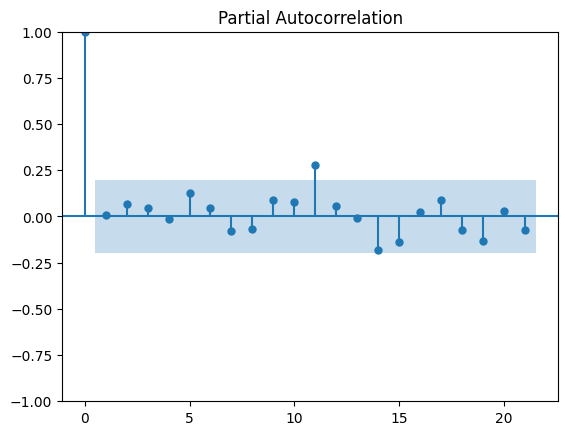

In [41]:
acf_res = plot_acf(residuals)

pacf_res = plot_pacf(residuals)

<Axes: >

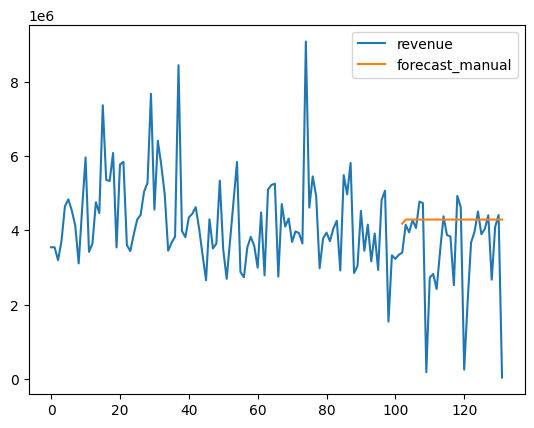

In [42]:
#Forecasting by manually choosing p,d,q values
forecast_test = model_fit.forecast(len(df_test))

df_new['forecast_manual'] = [None]*len(df_train) + list(forecast_test)

df_new.plot()

## Manual calculation of metrics

In [43]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(df_test, forecast_test)
mape = mean_absolute_percentage_error(df_test, forecast_test)
rmse = np.sqrt(mean_squared_error(df_test, forecast_test))

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')

mae - manual: 1014472.7754131857
mape - manual: 6.212184250037867
rmse - manual: 1571658.5644513366


## Auto-fit model

In [44]:
#Use auto_arima to check p,d,q values
import pmdarima as pm
auto_arima = pm.auto_arima(df_train, stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(1, 0, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [45]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  102
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1577.061
Date:                Fri, 22 Nov 2024   AIC                           3160.122
Time:                        07:14:49   BIC                           3167.997
Sample:                             0   HQIC                          3163.311
                                - 102                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9992      0.003    307.259      0.000       0.993       1.006
ma.L1         -0.8823      0.078    -11.256      0.000      -1.036      -0.729
sigma2       1.84e+12   6.71e-15   2.74e+26      0.000    1.84e+12    1.84e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):                48.80
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):               1.19   Skew:                             1.11
Prob(H) (two-sided):                  0.61   Kurtosis:                         5.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.22e+42. Standard errors may be unstable.
"""

<Axes: >

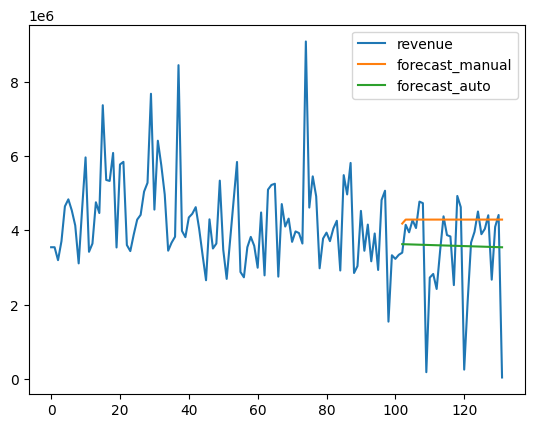

In [46]:
forecast_test_auto = auto_arima.predict(n_periods=len(df_test))
df_new['forecast_auto'] = [None]*len(df_train) + list(forecast_test_auto)

df_new.plot()

## Auto-fit metric calculation

In [47]:
mae = mean_absolute_error(df_test, forecast_test_auto)
mape = mean_absolute_percentage_error(df_test, forecast_test_auto)
rmse = np.sqrt(mean_squared_error(df_test, forecast_test_auto))

print(f'mae - auto: {mae}')
print(f'mape - auto: {mape}')
print(f'rmse - auto: {rmse}')

mae - auto: 981672.6433666531
mape - auto: 5.145592158301724
rmse - auto: 1326987.6809407002


## As MAPE of auto-fit is lesser than manual, we can rely more on auto-fit values as MAE and RMSE values fall within 2 standard deviations